# Shopping Card : An Analytical

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
customers = pd.read_csv('customers.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv')

Were gonna focused at orders 

```
Orders  ->  Customer (id)
            Sales (id)      ->  Product (id)
```

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [4]:
orders.order_date = pd.to_datetime(orders.order_date)
orders.delivery_date = pd.to_datetime(orders.delivery_date)

In [5]:
orders['delivery_time'] = (orders['delivery_date'] - orders['order_date']).dt.days

In [6]:
orders['order_month'] = orders['order_date'].dt.to_period('M').dt.month
orders['delivery_month'] = orders['delivery_date'].dt.to_period('M').dt.month

In [7]:
orders

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,order_month,delivery_month
0,1,64,30811,2021-08-30,2021-09-24,25,8,9
1,2,473,50490,2021-02-03,2021-02-13,10,2,2
2,3,774,46763,2021-10-08,2021-11-03,26,10,11
3,4,433,39782,2021-05-06,2021-05-19,13,5,5
4,5,441,14719,2021-03-23,2021-03-24,1,3,3
...,...,...,...,...,...,...,...,...
995,996,345,37843,2021-01-13,2021-02-02,20,1,2
996,997,346,53831,2021-01-18,2021-01-31,13,1,1
997,998,407,53308,2021-05-05,2021-05-21,16,5,5
998,999,428,31643,2021-06-15,2021-07-12,27,6,7


In [35]:
orders.describe().round()

,order_id,customer_id,payment,delivery_time,order_month,delivery_month
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,500.0,507.0,33973.0,14.0,5.0,6.0
std,289.0,277.0,14452.0,8.0,3.0,3.0
min,1.0,1.0,10043.0,1.0,1.0,1.0
25%,251.0,275.0,21329.0,8.0,3.0,3.0
50%,500.0,515.0,33698.0,14.0,5.0,6.0
75%,750.0,737.0,46249.0,21.0,8.0,8.0
max,1000.0,1000.0,59910.0,27.0,10.0,11.0


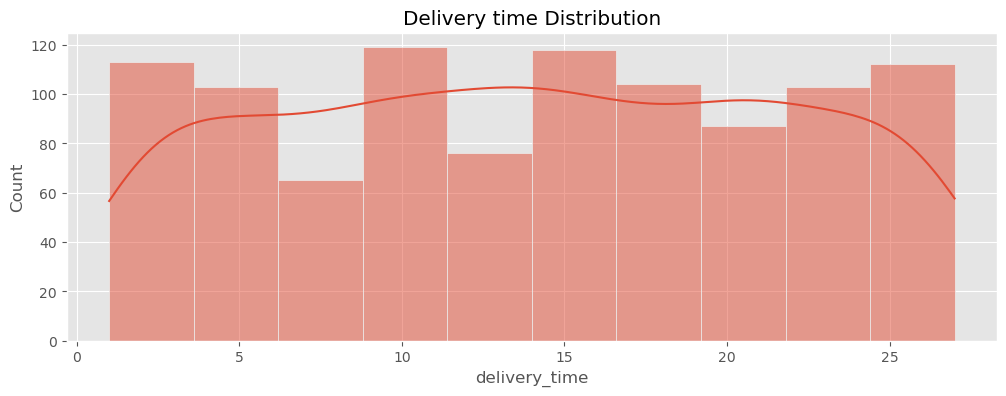

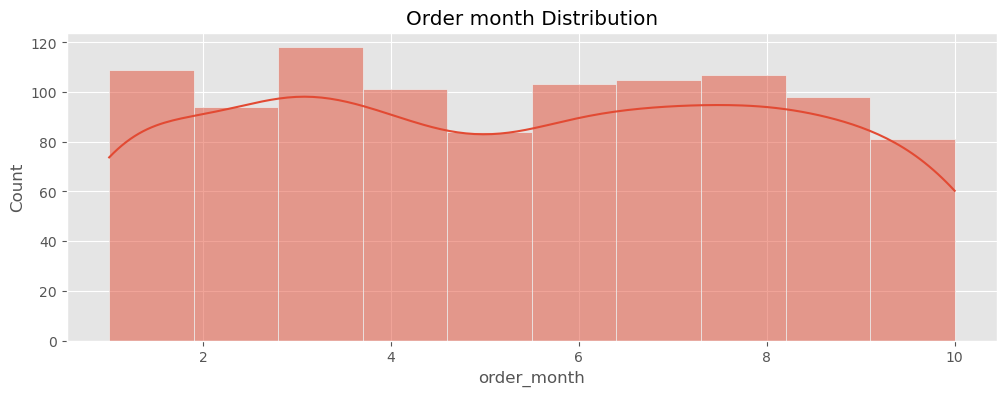

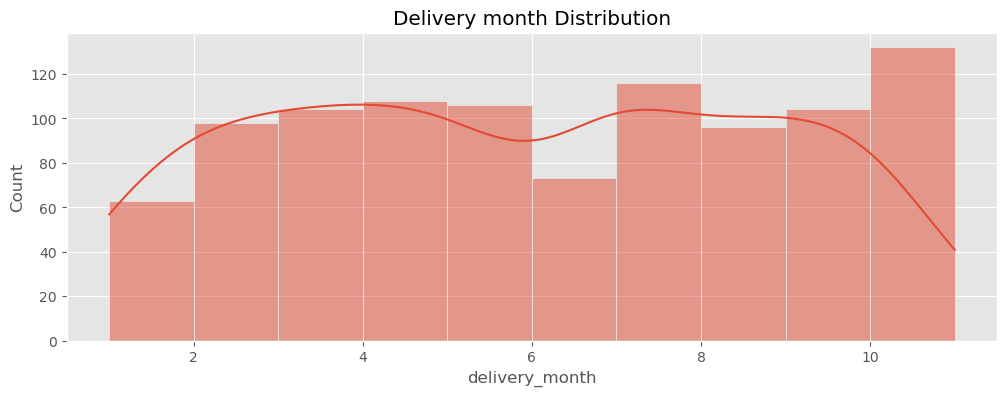

In [87]:
feats = ['delivery_time','order_month','delivery_month']

for col in feats:
    plt.figure(figsize=(12,4))
    # orders[col].hist()
    sns.histplot(orders[col],kde=True,bins=10)
    plt.title(f"{col.replace('_',' ').capitalize()} Distribution")
    plt.show()

In [66]:
totals = []

for ids in orders.order_id.values:
    totals.append(sales[sales.order_id == ids].total_price.sum())

In [67]:
shipping_prices = orders.payment - totals
shipping_prices

0      29324
1      49360
2      46255
3      38806
4      12676
       ...  
995    36384
996    53627
997    51956
998    31203
999    27836
Name: payment, Length: 1000, dtype: int64

Its doesnt make any sense, shipping prices that high. So lets forget how much the shipping was

In [143]:
#Demo Graphic

responds = []

for ids in orders.customer_id.values:
    respond = customers[customers.customer_id == ids].gender.values[0]
    # print(respond)
    if respond not in ['Male','Female']:
        respond = 'Non Binary'
    responds.append(respond)

In [144]:
# temp_df = orders[['order_id','customer_id']]
temp_df['Gender'] = responds

temp_df

C:\Users\intel\AppData\Local\Temp\ipykernel_18824\881766564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Gender'] = responds


,order_id,customer_id,Age,Gender
0,1,64,75,Non Binary
1,2,473,61,Male
2,3,774,34,Non Binary
3,4,433,46,Non Binary
4,5,441,53,Non Binary
...,...,...,...,...
995,996,345,62,Non Binary
996,997,346,40,Non Binary
997,998,407,41,Male
998,999,428,66,Non Binary


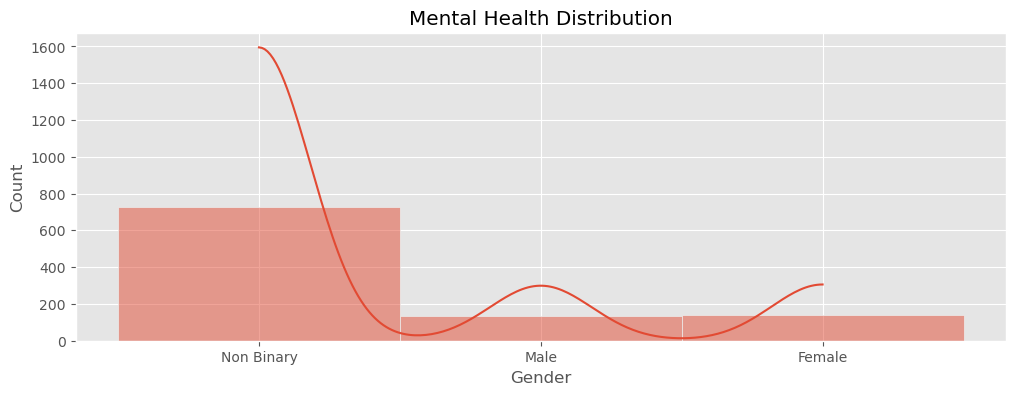

In [145]:
plt.figure(figsize=(12,4))
sns.histplot(temp_df['Gender'],kde=True,bins=10)
plt.title(f"Mental Health Distribution")
plt.show()

Im a homophobic so,....

In [103]:
temp_df.Age.unique()

array([75, 61, 34, 46, 53, 49, 64, 39, 67, 57, 54, 60, 45, 32, 36, 21, 63,
       78, 58, 80, 66, 24, 27, 26, 51, 48, 52, 38, 76, 28, 35, 29, 22, 72,
       20, 23, 47, 33, 56, 41, 31, 79, 74, 55, 65, 68, 42, 25, 40, 43, 37,
       30, 73, 62, 59, 50, 44, 77, 71, 70, 69], dtype=int64)

In [141]:
# Let's see what those mentally ills bought

responds = []

for ids in temp_df.order_id.values:
    # print(temp_df[temp_df.order_id == ids].Gender.values[0] )
    if temp_df[temp_df.order_id == ids].Gender.values[0] not in ['Male','Female']:
        new_respond = sales[sales.order_id == ids].product_id.values
        # print(new_respond)
    responds.extend(list(new_respond))

NonBinerBoughts = list(dict(sorted(Counter(responds).items(),key=lambda item:item[1],reverse=True)[:10]).keys())


In [142]:
products[products.product_ID.isin(NonBinerBoughts)]

,product_ID,product_type,product_name,size,colour,price,quantity,description
78,78,Shirt,Flannel,L,orange,96,59,"A orange coloured, L sized, Flannel Shirt"
182,182,Shirt,Camp Collared,M,orange,112,65,"A orange coloured, M sized, Camp Collared Shirt"
490,490,Jacket,Windbreaker,XS,red,109,79,"A red coloured, XS sized, Windbreaker Jacket"
539,539,Jacket,Leather,XL,yellow,113,67,"A yellow coloured, XL sized, Leather Jacket"
554,554,Jacket,Leather,XL,indigo,113,52,"A indigo coloured, XL sized, Leather Jacket"
737,737,Jacket,Peacoat,M,red,102,59,"A red coloured, M sized, Peacoat Jacket"
788,788,Jacket,Pullover,L,green,114,72,"A green coloured, L sized, Pullover Jacket"
886,886,Trousers,Cords,S,yellow,113,68,"A yellow coloured, S sized, Cords Trousers"
1149,1149,Trousers,Cargo Pants,XL,indigo,106,64,"A indigo coloured, XL sized, Cargo Pants Trousers"
1188,1188,Trousers,High-Waisted,L,violet,98,68,"A violet coloured, L sized, High-Waisted Trousers"


Turns out product prices is diff than sales price. Based on those diff, we could get the revenue

In [177]:
# lets see how much each revenue on sales
responds = []
for ids in sales.product_id.values:
    initial = products[products.product_ID == ids].price.values
    revenue = sales[sales.product_id == ids].price_per_unit.values[0] - initial
    responds.extend(revenue)
sales['Revenue'] = responds
sales

,sales_id,order_id,product_id,price_per_unit,quantity,total_price,Revenue
0,0,1,218,106,2,212,1
1,1,1,481,118,1,118,8
2,2,1,2,96,3,288,-18
3,3,1,1002,106,2,212,-5
4,4,1,691,113,3,339,-6
...,...,...,...,...,...,...,...
4995,4995,998,321,109,2,218,1
4996,4996,998,251,95,3,285,-22
4997,4997,999,872,113,1,113,13
4998,4998,999,998,106,2,212,-5
